<a href="https://colab.research.google.com/github/AmirHoseein99/Custom_yolo/blob/master/Custom_yolo_object_detection_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

get our config file and weights from the trained yolo

In [ ]:
yolo3_config_path = "/content/drive/MyDrive/Custom_Object_Detection/darknet/cfg/yolov3_custom_test.cfg"
yolo3_weights_path = "/content/drive/MyDrive/Custom_Object_Detection/backup/yolov3_custom_final.weights"
yolo_net = cv2.dnn.readNetFromDarknet(yolo3_config_path, yolo3_weights_path)

we have 2 classes, bike and person

In [ ]:
classes = ['bike', 'person']

our test image

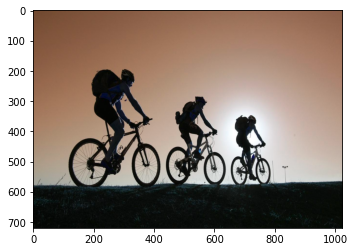

In [ ]:
test_img=cv2.imread("/content/drive/MyDrive/Custom_Object_Detection/test_images/2.jpg")
test_img = cv2.resize(test_img, (1024, 720))
ht, wt, _ = test_img.shape
_ = plt.imshow(test_img)

yolo takes blob instead of image, so we creat a blob from our image, with scaling and changing it's shape for yolov3 

In [ ]:
test_blob = cv2.dnn.blobFromImage(test_img, 1/255, (416, 416))
test_blob.shape

(1, 3, 416, 416)

feed the blob to yolo

In [ ]:
yolo_net.setInput(test_blob)

getting our yolo net output for the test image

In [ ]:
yolo_last_layer = yolo_net.getUnconnectedOutLayersNames()
last_layer_output = yolo_net.forward(yolo_last_layer)

first five elements are for the bounding boxes and after the fifth element we have our class probability

In [ ]:
boxes = []
confidences = []
class_ids = []

for output in last_layer_output : 
  for detection in output : 
      score = detection[5:]
      class_id = np.argmax(score)
      confidence = score[class_id] 

      center_x = int(detection[0] * wt)
      center_y = int(detection[1] * ht)
      w = int(detection[2] * wt)
      h = int(detection[3] * ht)

      x = int(center_x - w/2 )
      y = int(center_y - h/2 )
      
      boxes.append([x, y, w, h ])
      confidences.append(float(confidence))
      class_ids.append(class_id)
  

geting the best bounding boxes with confidence more than .4

In [ ]:
indexs = cv2.dnn.NMSBoxes(boxes, confidences, .4, .4)
colors = np.random.uniform(0, 255, size=(len(boxes), 3) )
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
indexs

array([[1640],
       [ 244],
       [1730]], dtype=int32)

In [ ]:
for i in indexs.flatten():
  x, y, w, h = boxes[i]
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(test_img, (x, y), (x+w, y+h), color,2)
  cv2.putText(test_img, label + " " + confidence, (x, y), font, 1, (0,0,0), 2 )

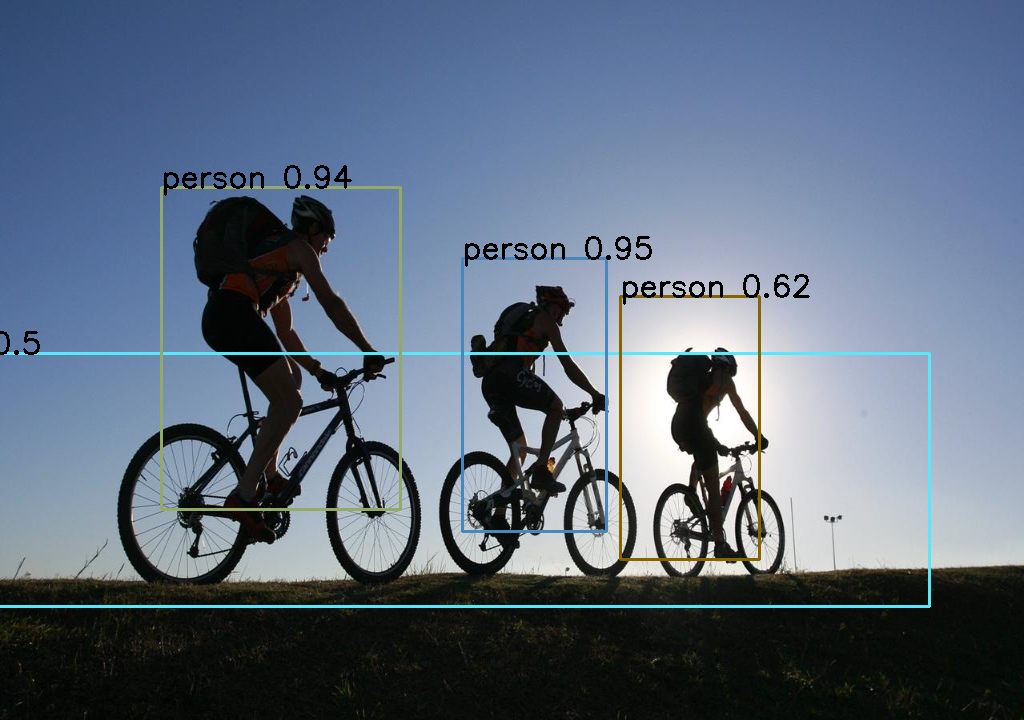

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()